# ANNOTATING BOXPLOTS

## IMPORTING NECESSARY PACKAGES

In [1]:
import os
import colorsys
import itertools
import pandas as pd
import seaborn as sns
from fractions import Fraction
import matplotlib.pyplot as plt
from typing import Iterable, Tuple
from statannotations.Annotator import Annotator

## SOME FUNCTIONS

In [2]:
### COLOURS ###

# This code I did not write, I grabbed it from the following URL:

# https://stackoverflow.com/questions/470690/how-to-automatically-generate-n-distinct-colors

def zenos_dichotomy() -> Iterable[Fraction]:
    """
    http://en.wikipedia.org/wiki/1/2_%2B_1/4_%2B_1/8_%2B_1/16_%2B_%C2%B7_%C2%B7_%C2%B7
    """
    for k in itertools.count():
        yield Fraction(1,2**k)

def fracs() -> Iterable[Fraction]:
    """
    [Fraction(0, 1), Fraction(1, 2), Fraction(1, 4), Fraction(3, 4), Fraction(1, 8), Fraction(3, 8), Fraction(5, 8), Fraction(7, 8), Fraction(1, 16), Fraction(3, 16), ...]
    [0.0, 0.5, 0.25, 0.75, 0.125, 0.375, 0.625, 0.875, 0.0625, 0.1875, ...]
    """
    yield Fraction(0)
    for k in zenos_dichotomy():
        i = k.denominator # [1,2,4,8,16,...]
        for j in range(1,i,2):
            yield Fraction(j,i)

# can be used for the v in hsv to map linear values 0..1 to something that looks equidistant
# bias = lambda x: (math.sqrt(x/3)/Fraction(2,3)+Fraction(1,3))/Fraction(6,5)

HSVTuple = Tuple[Fraction, Fraction, Fraction]
RGBTuple = Tuple[float, float, float]

def hue_to_tones(h: Fraction) -> Iterable[HSVTuple]:
    for s in [Fraction(6,10)]: # optionally use range
        for v in [Fraction(8,10),Fraction(5,10)]: # could use range too
            yield (h, s, v) # use bias for v here if you use range

def hsv_to_rgb(x: HSVTuple) -> RGBTuple:
    return colorsys.hsv_to_rgb(*map(float, x))

flatten = itertools.chain.from_iterable

def hsvs() -> Iterable[HSVTuple]:
    return flatten(map(hue_to_tones, fracs()))

def rgbs() -> Iterable[RGBTuple]:
    return map(hsv_to_rgb, hsvs())

def plot_boxes(df, x, y, order, pairs, col_palette, flierprops, fsize = (5, 5), dpi = 100, annotate = False, ann_loc = "inside", ylab = None, out = None, show = True):
    """
    customised boxplot plotting function
    """
    plt.figure(figsize = fsize, dpi = dpi)
    
    ax = sns.boxplot(data = df, x = x, y = y, order = order, palette = col_palette, flierprops = flierprops)
    if ylab != None:
        plt.ylabel(ylab)
    if annotate == True:
        annotator = Annotator(ax, pairs, data = df, x = x, y = y, order = order)
        annotator.configure(test = "Mann-Whitney", text_format = "star", loc = ann_loc)
        annotator.apply_and_annotate()
        
    if show == False:
        plt.close()
        
    if out != None:
        plt.savefig(out)

## READING INPUT DATA

In [4]:
main_dir = "./../"
results_dir = os.path.join(main_dir, "results")
figs_dir = os.path.join(main_dir, "figs")

In [5]:
rsa_df = pd.read_pickle(os.path.join(results_dir, "clusters_rsa.pkl"))
shenk_df = pd.read_pickle(os.path.join(results_dir, "clusters_shenkin.pkl"))
mess_df = pd.read_pickle(os.path.join(results_dir, "clusters_mes.pkl"))
burial_df = pd.read_pickle(os.path.join(results_dir, "clusters_burial_size.pkl"))

In [6]:
order = [1, 2, 3, 4]
pairs = [(1, 2),(1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
flierprops = dict(marker = "o", markerfacecolor = "black", markersize = 4,
                  markeredgecolor = "none")
sample_colors = list(itertools.islice(rgbs(), 200)) # list of colours
my_pal = {i: sample_colors[i-1] for i in order}

## CHARACTERISING RSA-BASED CLUSTERS: RSA

In [7]:
rsa_df.head(3)

,RSA,Cluster
0,29.878,1
1,78.378,1
2,32.990,1


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.288e-28 U_stat=3.725e+05
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:4.524e-19 U_stat=4.365e+05
3 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.302e-09 U_stat=3.842e+04
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.741e-62 U_stat=1.396e+05
2 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:7.928e-26 U_stat=4.988e+04
1 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:2.371e-46 U_stat=1.292e+04


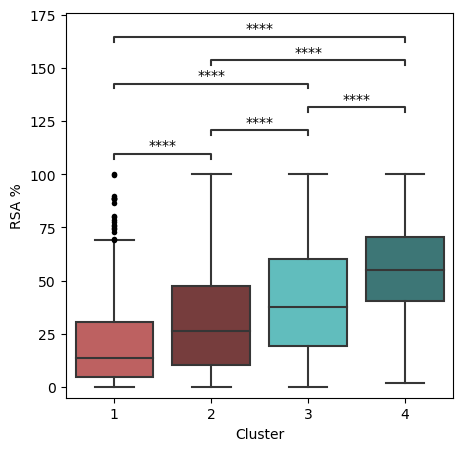

In [12]:
plot_boxes(
    rsa_df, "Cluster", "RSA", order, pairs, my_pal, flierprops,
    fsize = (5, 5), dpi = 100, annotate = True, ann_loc = "inside", ylab = "RSA %",
    #out = os.path.join(figs_dir, "RSA_clusters_size.png"),
    show = True
)

## CHARACTERISING RSA-BASED CLUSTERS: SHENKIN

In [13]:
shenk_df.head(3)

,Shenkin,Cluster
0,30.120869,1
1,1.157336,1
2,18.244813,1


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.249e-13 U_stat=1.550e+05
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.794e-06 U_stat=1.713e+05
3 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:5.934e-01 U_stat=1.595e+04
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:7.938e-24 U_stat=6.249e+04
2 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:5.003e-02 U_stat=2.624e+04
1 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.202e-07 U_stat=9.253e+03


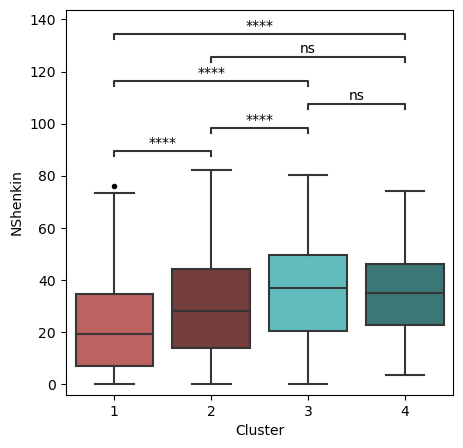

In [17]:
plot_boxes(
    shenk_df, "Cluster", "Shenkin", order, pairs, my_pal, flierprops,
    fsize = (5, 5), dpi = 100, annotate = True, ann_loc = "inside", ylab = "NShenkin",
    #out = os.path.join(figs_dir, "RSA_clusters_size.png"),
    show = True
)

## CHARACTERISING RSA-BASED CLUSTERS: MES

In [18]:
mess_df.head(3)

,MES,Cluster
0,-0.750113,1
1,-0.277961,1
2,-0.567075,1


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.733e-04 U_stat=8.297e+04
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:6.473e-02 U_stat=1.174e+05
3 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:8.577e-02 U_stat=8.740e+03
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:8.987e-07 U_stat=4.460e+04
2 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.560e-02 U_stat=1.385e+04
1 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:4.412e-05 U_stat=5.080e+03


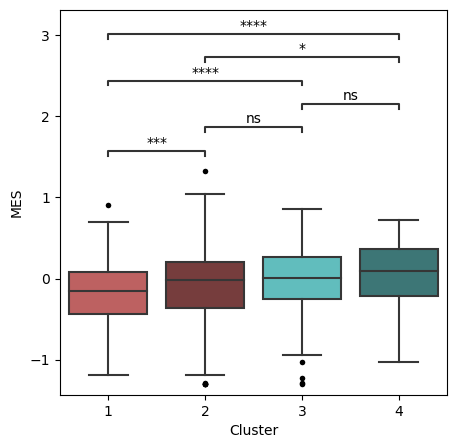

In [20]:
plot_boxes(
    mess_df, "Cluster", "MES", order, pairs, my_pal, flierprops,
    fsize = (5, 5), dpi = 100, annotate = True, ann_loc = "inside",
    #out = os.path.join(figs_dir, "RSA_clusters_size.png"),
    show = True
)

## CHARACTERISING RSA-BASED CLUSTERS: SITE SIZE

In [21]:
burial_df.head(3)

,cluster_id,prop_burial,bs_size
0,1,0.666667,24
1,1,1.000000,6
2,1,0.666667,12


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.111e-04 U_stat=3.997e+03
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.288e-07 U_stat=8.114e+03
3 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.826e-07 U_stat=2.165e+03
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.344e-09 U_stat=3.419e+03
2 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:2.547e-13 U_stat=3.443e+03
1 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:4.910e-11 U_stat=1.270e+03


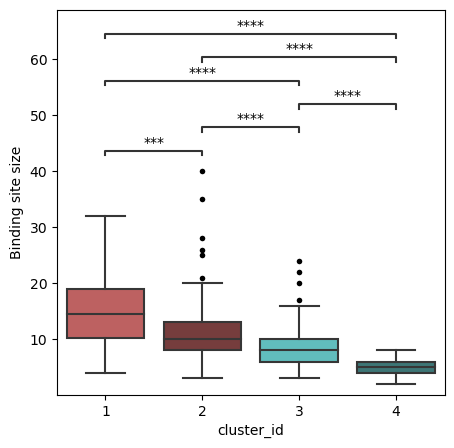

In [25]:
plot_boxes(
    burial_df, "cluster_id", "bs_size", order, pairs, my_pal, flierprops,
    fsize = (5, 5), dpi = 100, annotate = True, ann_loc = "inside", ylab = "Binding site size",
    #out = os.path.join(figs_dir, "RSA_clusters_size.png"),
    show = True
)

## CHARACTERISING RSA-BASED CLUSTERS: BURIAL

In [26]:
burial_df.head(3)

,cluster_id,prop_burial,bs_size
0,1,0.666667,24
1,1,1.000000,6
2,1,0.666667,12


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:7.213e-17 U_stat=5.344e+03
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.139e-22 U_stat=1.027e+04
3 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.095e-10 U_stat=2.368e+03
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:4.278e-21 U_stat=4.158e+03
2 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:8.333e-17 U_stat=3.664e+03
1 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:3.237e-13 U_stat=1.334e+03


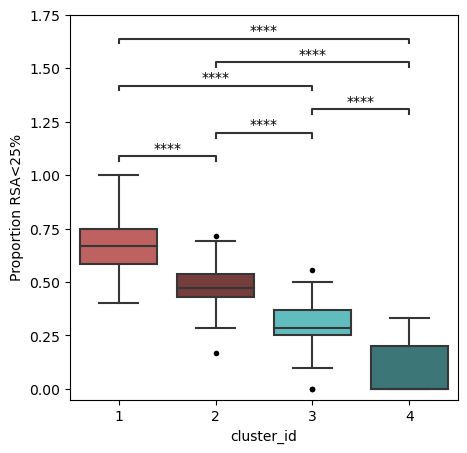

In [29]:
plot_boxes(
    burial_df, "cluster_id", "prop_burial", order, pairs, my_pal, flierprops,
    fsize = (5, 5), dpi = 100, annotate = True, ann_loc = "inside", ylab = "Proportion RSA<25%",
    #out = os.path.join(figs_dir, "RSA_clusters_prop_burial.png"),
    show = True
)